# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [8]:
#Heart Disease UCI
#import matplotlib
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
print('Hi')
TEXT_COLOR = 'black'

sns.set_style('darkgrid')

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


Hi


In [ ]:
df_src = pd.read_csv('heart_cleveland_upload.csv', index_col=0)
df_src.info()

In [4]:
df_src

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,,,,,,,,,,,,,
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
35,1,3,120,198,0,0,130,1,1.6,1,0,2,1


In [5]:
df_src['condition'].value_counts() #не равно но близко к соотношению 50/50

condition
0    160
1    137
Name: count, dtype: int64

<AxesSubplot:>

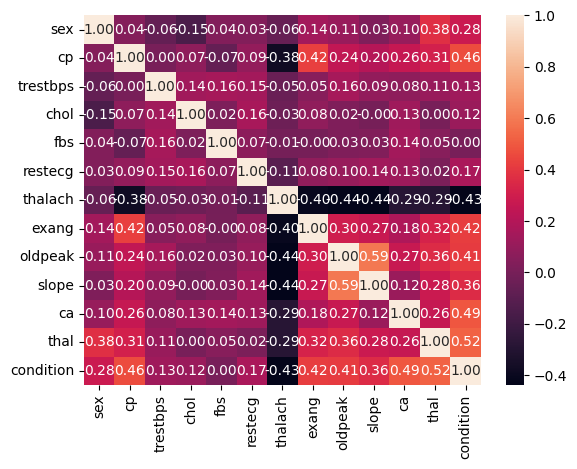

In [7]:

cor_mtrx = df_src.corr(method='spearman')
plt.figure()
sns.heatmap(cor_mtrx, annot=True, fmt='.2f')

In [ ]:
drop = 1 #убираем ненужное
if drop == 1:
    df_src.drop(columns=['fbs', 'chol','trestbps'])

In [12]:

df_train, df_test = train_test_split(df_src, test_size=0.3, stratify=df_src['condition'], random_state=RANDOM_SEED)

minmax = MinMaxScaler()
minmax.set_output(transform='pandas')
minmax.fit(df_train)
df_train = minmax.transform(df_train)
df_test = minmax.transform(df_test)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=RANDOM_SEED) #объект модели
y_train = df_train.pop('condition')
y_test_true = df_test.pop('condition')
model.fit(df_train,y_train)
y_test_pred = model.predict(df_test)


report = classification_report(y_test_true, y_test_pred, digits=4)

print(report)

              precision    recall  f1-score   support

         0.0     0.8519    0.9583    0.9020        48
         1.0     0.9444    0.8095    0.8718        42

    accuracy                         0.8889        90
   macro avg     0.8981    0.8839    0.8869        90
weighted avg     0.8951    0.8889    0.8879        90

